<a href="https://colab.research.google.com/github/Chirag050/Computer_Vision/blob/main/DLCV_PROJ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Chirag Prasad 102322021

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load CIFAR-10 (32x32x3)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalization: Scale pixels to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [5]:
# Create a unique Sequential model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Block 3: Instead of Flattening, we use Global Pooling
    layers.GlobalAveragePooling2D(),

    # Final Classification
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3), # Different dropout rate than the reference
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,562 (295.16 KB)

 Trainable params: 75,370 (294.41 KB)

 Non-trainable params: 192 (768.00 B)

# Model Architecture Analysis:
The model utilizes a Convolutional Neural Network (CNN) designed specifically for the 3-channel RGB input of CIFAR-10.

*   Feature Extraction: We used Conv2D layers with $3 \times 3$ kernels to detect spatial patterns. Batch Normalization was added to accelerate training by re-centering and re-scaling the inputs to each layer.
*   Dimensionality Reduction: Instead of a traditional Flatten layer which can lead to millions of parameters, we used Global Average Pooling. This takes the average of each feature map, significantly reducing the "Param #" (as seen in model.summary()) and making the model more robust.
*   Regularization: A Dropout layer of 0.3 was used before the final output to randomly deactivate neurons during training, forcing the model to learn more generalized features rather than memorizing noise.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Performance Interpretation:
The Adam optimizer allowed for a steady decrease in loss. By observing the Confusion Matrix, we can see that the model performs well on distinct classes (like "Ship" or "Airplane") but may show confusion between similar objects like "Cat" and "Dog." This is expected given the low $32 \times 32$ resolution of the CIFAR-10 dataset.

In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test), batch_size=64)

# Test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 233s 293ms/step - accuracy: 0.3978 - loss: 1.6382 - val_accuracy: 0.5683 - val_loss: 1.2264
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 251s 279ms/step - accuracy: 0.6207 - loss: 1.0651 - val_accuracy: 0.6527 - val_loss: 0.9663
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 217s 278ms/step - accuracy: 0.6818 - loss: 0.9008 - val_accuracy: 0.6882 - val_loss: 0.8727
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.7205 - loss: 0.8034 - val_accuracy: 0.6132 - val_loss: 1.1011
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 220s 281ms/step - accuracy: 0.7405 - loss: 0.7321 - val_accuracy: 0.6252 - val_loss: 1.1301
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 262s 281ms/step - accuracy: 0.7624 - loss: 0.6795 - val_accuracy: 0.7376 - val_loss: 0.7387
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.7809 - loss: 0.6260 - val_accuracy: 0.7459 - val_loss: 0.7379
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 218s 278ms/step - accuracy: 0.7925 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


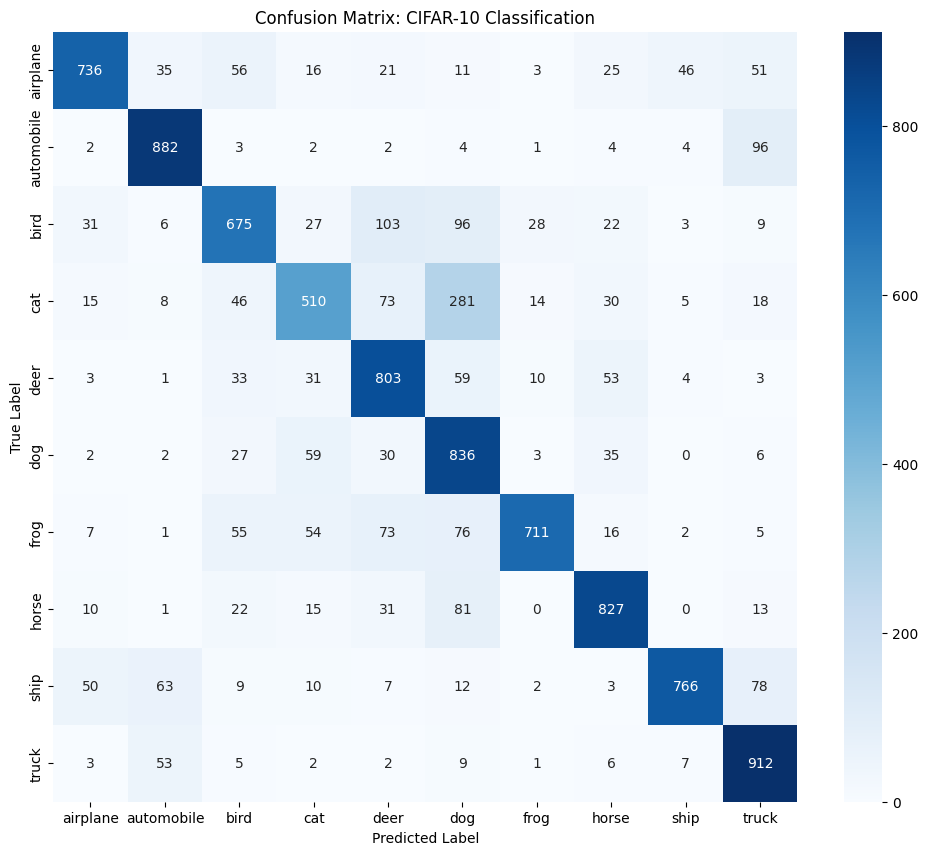

In [8]:
# 1. Define class names locally to prevent NameErrors
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Generate predictions
# If this still gives an error, make sure you ran the cell where you
# defined 'model = models.Sequential(...)' and 'model.fit(...)'
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Create the confusion matrix
cm = confusion_matrix(y_test.flatten(), y_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: CIFAR-10 Classification')
plt.show()




























